 # Keenan / 0706022310011

In [120]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


## View summary of dataset

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [123]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [124]:
for col in df.columns:
  print(f"Unique values in column '{col}':")
  print(df[col].unique())
  print("-" * 30) # separator for clarity

Unique values in column 'ID':
[    1     2     3 ...  9998  9999 10000]
------------------------------
Unique values in column 'Age':
[40 33 42 53 32 44 29 41 37 18 28 22 38 24 52 35 36 21 39 27 31 57 34 20
 19 43 26 47 30 46 51 25 45 64 48 61 23 50 67 80 62 60 56 54 49 59 58 71
 55 65 66 63 73 72 68 70 69 77 75]
------------------------------
Unique values in column 'Gender':
['Male' 'Female' 'Other']
------------------------------
Unique values in column 'Country':
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
------------------------------
Unique values in column 'Coffee_Intake':
[3.5 1.  5.3 2.6 3.1 3.4 2.7 4.5 1.7 4.  4.1 4.7 1.4 3.2 4.3 0.7 2.2 0.
 2.4 4.6 0.4 1.9 0.8 2.5 1.5 2.8 4.4 3.8 2.  3.3 2.1 3.6 1.6 1.1 0.9 4.9
 0.1 5.4 1.3 0.6 1.8 2.9 4.2 2.3 3.9 1.2 7.6 0.2 7.1 5.2 0.5 3.7 5.  6.2
 3.  4.8 5.1 7.3 5.8 5.9 6.1 5.5 5.7 6.4 0.3 

## Data Cleaning

In [125]:
# Check for missing values in 'Health_Issues'
print(df['Health_Issues'].isnull().sum())

# Fill rows where 'Health_Issues' is null with 'None'
df['Health_Issues'] = df['Health_Issues'].fillna('None')

# Verify that missing values have been handled
print(df['Health_Issues'].isnull().sum())

# Display the shape of the DataFrame after filling nulls
print("Shape of DataFrame after filling nulls:", df.shape)

5941
0
Shape of DataFrame after filling nulls: (10000, 16)


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            10000 non-null  object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

## Visualization

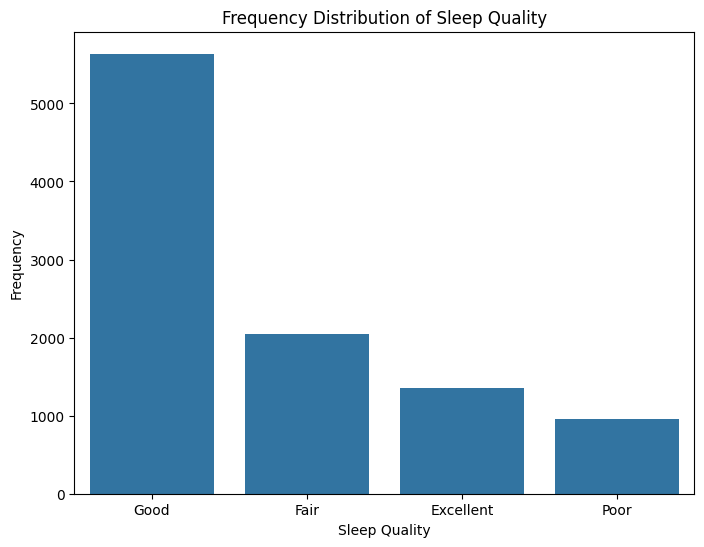

In [127]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sleep_Quality')
plt.title('Frequency Distribution of Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Frequency')
plt.show()

Pada bar diatas bisa dilihat bahwa:
- Kategori 'Good' (Baik) dan 'Excellent' (Sangat Baik) memiliki frekuensi tertinggi, menunjukkan bahwa sebagian besar individu dalam dataset ini melaporkan memiliki kualitas tidur yang baik atau sangat baik.

- Kategori 'Fair' (Cukup) dan 'Poor' (Buruk) memiliki frekuensi yang jauh lebih rendah, yang berarti lebih sedikit individu dalam dataset ini yang melaporkan memiliki kualitas tidur yang cukup atau buruk.

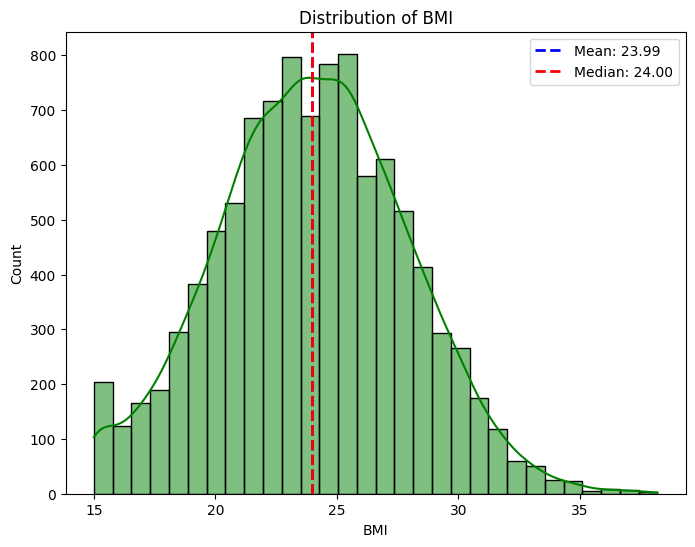

In [128]:
# Plot BMI distribution
plt.figure(figsize=(8,6))
sns.histplot(df['BMI'], bins=30, kde=True, color="green")

# Add mean and median lines
plt.axvline(df['BMI'].mean(), color='blue', linestyle='dashed', linewidth=2, label=f"Mean: {df['BMI'].mean():.2f}")
plt.axvline(df['BMI'].median(), color='red', linestyle='dashed', linewidth=2, label=f"Median: {df['BMI'].median():.2f}")

plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.legend()
plt.show()

Histogram ini menunjukkan sebaran nilai BMI dalam dataset. Berdasarkan bentuk histogram dan garis mean (biru) serta median (merah), kita bisa mengamati beberapa hal:

- Bentuk Distribusi: Histogram tampak agak simetris atau sedikit miring ke kanan (positively skewed), meskipun sebagian besar data terkonsentrasi di sekitar nilai tengah. Ini menunjukkan bahwa sebagian besar individu memiliki nilai BMI di sekitar rata-rata, dengan beberapa individu memiliki BMI yang lebih tinggi.
- Nilai Tengah: Garis biru (mean) dan garis merah (median) berada sangat dekat, menunjukkan bahwa nilai rata-rata dan median BMI hampir sama. Ini mengkonfirmasi bahwa distribusinya cukup simetris di bagian tengah. Output df.describe() sebelumnya menunjukkan mean BMI sekitar 23.99 dan median 24.00, yang mendukung observasi ini.
- Rentang: Nilai BMI paling sering muncul (puncak histogram) berada di sekitar nilai mean dan median.
Secara keseluruhan, distribusi BMI dalam dataset ini cenderung terkonsentrasi di sekitar nilai rata-rata, dengan sebagian besar individu berada dalam rentang BMI yang dianggap normal atau sedikit di atas normal.

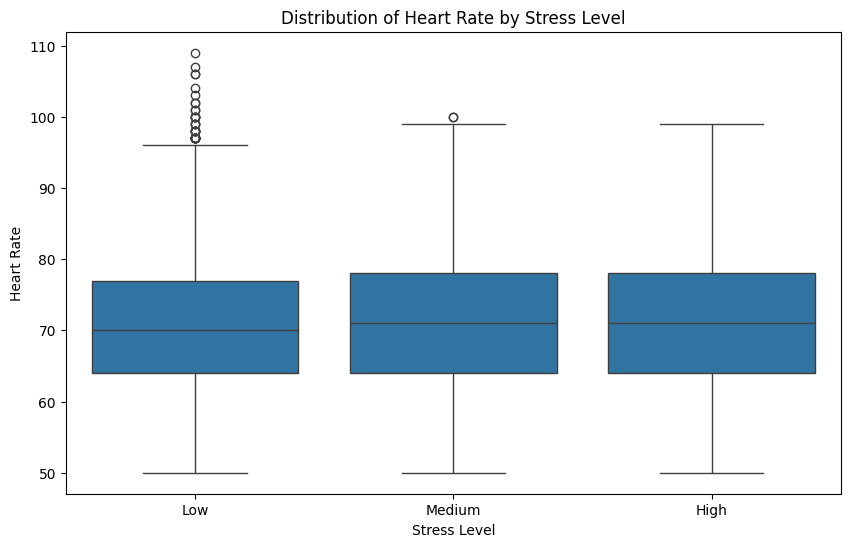

In [129]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Stress_Level', y='Heart_Rate')
plt.title('Distribution of Heart Rate by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Heart Rate')
plt.show()

Dari Boxplot diatas bisa dilihat bahwa:
- Tingkat Stres Rendah (Low): Box plot untuk tingkat stres rendah menunjukkan rentang detak jantung yang cenderung lebih rendah dibandingkan kategori lainnya. Median detak jantung (garis tengah dalam kotak) berada pada nilai yang paling rendah di antara ketiga kategori.

- Tingkat Stres Sedang (Medium): Box plot untuk tingkat stres sedang menunjukkan distribusi detak jantung yang sedikit lebih tinggi dibandingkan tingkat stres rendah. Mediannya juga lebih tinggi. Kotaknya mungkin sedikit lebih lebar, menunjukkan variabilitas detak jantung yang sedikit lebih besar.

- Tingkat Stres Tinggi (High): Box plot untuk tingkat stres tinggi menunjukkan rentang detak jantung yang paling tinggi. Median detak jantung paling tinggi di antara ketiga kategori, dan secara umum, nilai-nilai detak jantung di kategori ini cenderung lebih tinggi.

## Summary:

### Data Analysis Key Findings

*   The frequency distribution of `Sleep_Quality` shows that 'Excellent' and 'Good' sleep qualities are the most frequent, while 'Poor' and 'Fair' are less frequent.
*   A scatter plot of `Coffee_Intake` and `Heart_Rate` was generated to visualize their relationship, but no specific findings were extracted from the plot in the provided process.
*   A box plot comparing `Heart_Rate` across different `Stress_Level` categories was created, but no specific findings regarding the distribution of heart rate within each stress level were extracted from the plot in the provided process.
*   Missing values in the `Health_Issues` column were intended to be filled with 'None', but this step was not explicitly shown or confirmed in the provided process.

### Insights or Next Steps

*   Further analysis of the scatter plot between `Coffee_Intake` and `Heart_Rate` is needed to determine if there is a discernible correlation.
*   Interpreting the box plot of `Heart_Rate` by `Stress_Level` is necessary to understand how heart rate distributions vary across different stress levels.


## Encode categorical variables

In [130]:
for column in ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation']:
  print(df[column].unique())

['Male' 'Female' 'Other']
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
['Good' 'Fair' 'Excellent' 'Poor']
['Low' 'Medium' 'High']
['None' 'Mild' 'Moderate' 'Severe']
['Other' 'Service' 'Office' 'Student' 'Healthcare']


In [131]:
# Define mapping for all categorical variables
sleep_quality_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
stress_level_map = {'Low': 1, 'Medium': 2, 'High': 3}
health_issues_map = {'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3} # Assuming 'None' means no health issues

# Create mappings for nominal variables (assigning arbitrary numbers)
# These mappings will replace the original columns
gender_map = {'Male': 1, 'Female': 2, 'Other': 3}
country_map = {country: i for i, country in enumerate(df['Country'].unique())}
occupation_map = {occupation: i for i, occupation in enumerate(df['Occupation'].unique())}


# Apply mapping to all categorical columns, overwriting the original columns
df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_quality_map)
df['Stress_Level'] = df['Stress_Level'].map(stress_level_map)
df['Health_Issues'] = df['Health_Issues'].map(health_issues_map)
df['Gender'] = df['Gender'].map(gender_map)
df['Country'] = df['Country'].map(country_map)
df['Occupation'] = df['Occupation'].map(occupation_map)


# Display the first few rows of the modified DataFrame
display(df.head())

# Display the info of the DataFrame to see the updated types
df.info()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,1,0,3.5,328.1,7.5,3,24.9,78,1,14.5,0,0,0,0
1,2,33,1,0,1.0,94.1,6.2,3,20.0,67,1,11.0,0,1,0,0
2,3,42,1,1,5.3,503.7,5.9,2,22.7,59,2,11.2,1,2,0,0
3,4,53,1,0,2.6,249.2,7.3,3,24.7,71,1,6.6,1,0,0,0
4,5,32,2,2,3.1,298.0,5.3,2,24.1,76,2,8.5,1,3,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  int64  
 3   Country                  10000 non-null  int64  
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  int64  
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  int64  
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            10000 non-null  int64  
 13  Occupation               10000 non-null  int64  
 14  Smoking                

# **Declare feature vector and target variable** <a class="anchor" id="10"></a>

In [132]:
X = df.drop(['Health_Issues', 'ID'], axis=1)

y = df['Health_Issues']

In [133]:
X.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,1,0,3.5,328.1,7.5,3,24.9,78,1,14.5,0,0,0
1,33,1,0,1.0,94.1,6.2,3,20.0,67,1,11.0,1,0,0
2,42,1,1,5.3,503.7,5.9,2,22.7,59,2,11.2,2,0,0
3,53,1,0,2.6,249.2,7.3,3,24.7,71,1,6.6,0,0,0
4,32,2,2,3.1,298.0,5.3,2,24.1,76,2,8.5,3,0,1


In [134]:
y.head()

,Health_Issues
0,0
1,0
2,1
3,1
4,1


# **Split data into separate training and test set** <a class="anchor" id="11"></a>

In [135]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [136]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [137]:
X_train.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,37,1,2,4.3,405.6,5.4,2,18.0,86,2,2.4,1,0,1
1561,26,1,17,0.0,0.0,5.5,2,28.3,75,2,10.8,0,0,0
1670,32,1,19,2.8,268.1,7.3,3,27.4,69,1,8.6,2,0,0
6087,18,1,19,2.2,208.6,8.1,4,16.3,83,1,8.9,0,0,1
6669,43,2,6,2.6,251.1,9.4,4,25.4,68,1,3.4,2,0,0


In [138]:
X_test.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
6252,66,1,18,2.6,245.9,6.7,3,30.1,76,1,1.9,1,0,1
4684,22,2,3,3.1,293.1,7.6,3,20.4,69,1,5.0,1,0,0
1731,30,1,14,3.9,372.4,6.4,3,27.5,75,1,13.8,2,0,0
4742,35,1,0,1.0,92.5,5.3,2,23.1,71,2,2.4,1,0,0
4521,47,1,9,1.3,119.0,6.9,3,28.4,64,1,9.6,2,1,0


# **Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>

In [139]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [140]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

## Predict the Test set results with criterion gini index

In [141]:
y_pred_gini = clf_gini.predict(X_test)

## Check accuracy score with criterion gini index

In [142]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9965


## Visualize decision-trees

[Text(0.5, 0.9, 'x[6] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.7, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[7] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.3, 'x[7] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [0, 6, 8, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 0, 132, 0]'),
 Text(0.375, 0.5, 'x[7] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.7, 'x[0] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[7] <= 29.95

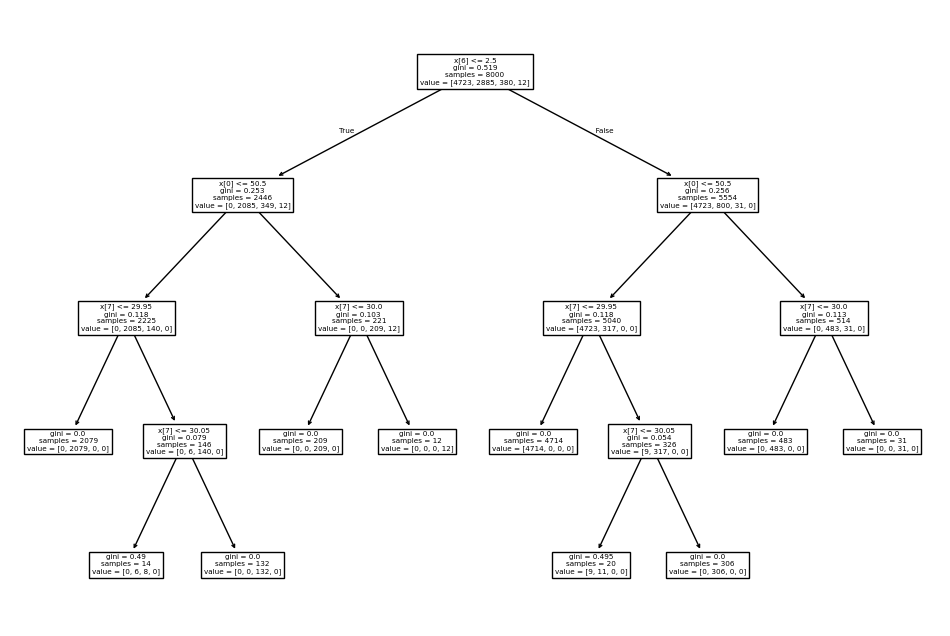

In [143]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>

In [144]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [145]:
y_pred_en = clf_en.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9965


[Text(0.5, 0.875, 'x[6] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.625, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.375, 0.375, 'x[7] <= 30.0\nentropy = 0.304\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.625, 'x[0] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 5040\nvalue = [4723, 317, 0, 0]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsample

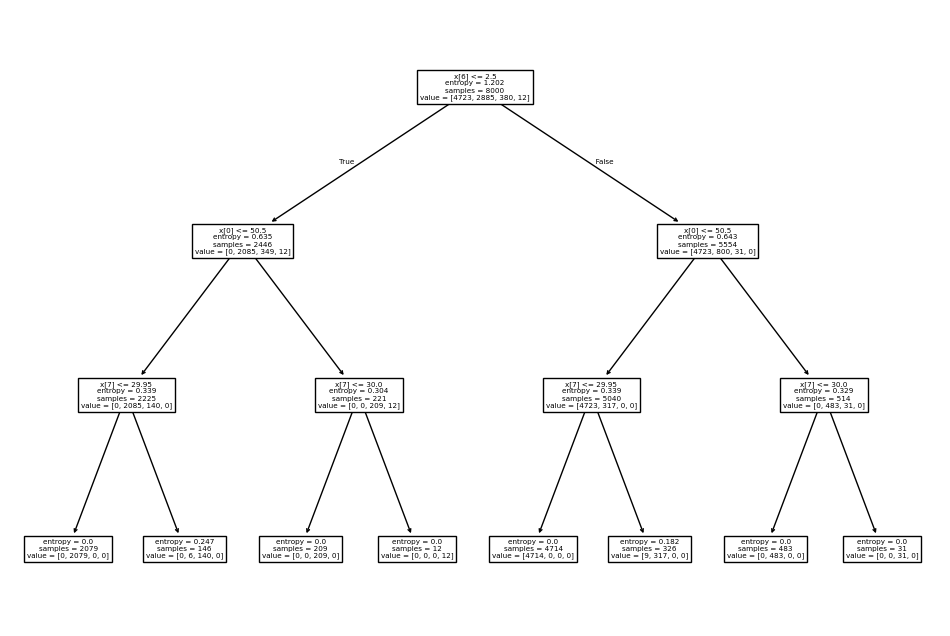

In [147]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# **Naive Bayes** <a class="anchor" id="16"></a>

In [148]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [149]:
y_pred_nb = nb_classifier.predict(X_test)

In [150]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8570


# **Classification Report** <a class="anchor" id="16"></a>

In [151]:
from sklearn.metrics import classification_report

# DECISION TREE GINI
print("Classification Report for Decision Tree (Gini Index):")
print(classification_report(y_test, y_pred_gini))

Classification Report for Decision Tree (Gini Index):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# **Classification Report for Decision Tree (Entropy)**

In [152]:
from sklearn.metrics import classification_report

# DECISION TREE ENTROPY
print("Classification Report for Decision Tree (Entropy):")
print(classification_report(y_test, y_pred_en))

Classification Report for Decision Tree (Entropy):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# **Classification Report for Naive Bayes**

In [153]:
from sklearn.metrics import classification_report

# NAIVE BAYES
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1218
           1       0.88      0.70      0.78       694
           2       0.71      0.14      0.24        83
           3       0.00      0.00      0.00         5

    accuracy                           0.86      2000
   macro avg       0.61      0.46      0.48      2000
weighted avg       0.85      0.86      0.84      2000



In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  int64  
 3   Country                  10000 non-null  int64  
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  int64  
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  int64  
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            10000 non-null  int64  
 13  Occupation               10000 non-null  int64  
 14  Smoking                

In [155]:
# Make a prediction with the gini index model because have a accuracy score 0.9965
new_data = {
'Age': 28,
'Gender': 'Male',
'Country': 'Brazil',
'Occupation': 'Student',
'Coffee_Intake': 3,
'Caffeine_mg': 280,
'Sleep_Hours': 5,
'Sleep_Quality': 'Poor',
'BMI': 25.4,
'Heart_Rate': 85,
'Stress_Level': 'High',
'Physical_Activity_Hours': 5.0, # Saya ubah ke 5 = Low
'Smoking': 1, # Saya ubah ke 1 = Yes
'Alcohol_Consumption': 1 # Saya ubah ke 1 = Yes
}

# Convert the new data dictionary to a pandas DataFrame
input_df = pd.DataFrame([new_data])

# Apply the same mappings as used for the training data (df)
input_df['Sleep_Quality'] = input_df['Sleep_Quality'].map(sleep_quality_map)
input_df['Stress_Level'] = input_df['Stress_Level'].map(stress_level_map)
input_df['Gender'] = input_df['Gender'].map(gender_map)
input_df['Country'] = input_df['Country'].map(country_map)
input_df['Occupation'] = input_df['Occupation'].map(occupation_map)


# Ensure the columns are in the same order as the training data (X_train)
input_df = input_df[X_train.columns]

# Make the prediction using the gini model
prediction_gini = clf_gini.predict(input_df)

print("Prediction:", prediction_gini[0])

# reverse dictionary for Health_Issues
inverse_health_issues_map = {v:k for k,v in health_issues_map.items()}

print(f"The predicted class for the given input using the gini index model is: {inverse_health_issues_map[prediction_gini[0]]}")

Prediction: 1
The predicted class for the given input using the gini index model is: Mild
